In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.tournament import RoundRobinTournament

import torch
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 12)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    AllC,
    AllD,
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
])

In [3]:
class QLearningTest(DeepQLearner):
    lookback = 4
    epsilon = 0.2

agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=250,
    noise=0,
    repetitions=5,
    epochs=10,
)

[04:15:48] Training commencing.
TRAINING AGAINST AllC
TRAINING AGAINST SteinAndRapoport
TRAINING AGAINST Davis
TRAINING AGAINST Joss
TRAINING AGAINST Tullock
TRAINING AGAINST Nydegger
TRAINING AGAINST Shubik
TRAINING AGAINST Grudger
TRAINING AGAINST Feld
TRAINING AGAINST TidemanAndChieruzzi
TRAINING AGAINST Grofman
TRAINING AGAINST AllD
TRAINING AGAINST TitForTat
TRAINING AGAINST Downing
[04:16:19] Completed epoch 1: 1.5478561751333204
TRAINING AGAINST Joss
TRAINING AGAINST Feld
TRAINING AGAINST Grofman
TRAINING AGAINST Grudger
TRAINING AGAINST Nydegger
TRAINING AGAINST TidemanAndChieruzzi
TRAINING AGAINST SteinAndRapoport
TRAINING AGAINST Downing
TRAINING AGAINST Davis
TRAINING AGAINST TitForTat
TRAINING AGAINST Shubik
TRAINING AGAINST AllD
TRAINING AGAINST Tullock
TRAINING AGAINST AllC
[04:16:49] Completed epoch 2: 1.2010452121776944
TRAINING AGAINST Feld
TRAINING AGAINST AllC
TRAINING AGAINST SteinAndRapoport
TRAINING AGAINST Shubik
TRAINING AGAINST Grudger
TRAINING AGAINST Tullock


In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())

print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=2, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 30413, <Action.DEFECT: 1>: 144587}
{<Action.COOPERATE: 0>: 0.17378857142857143, <Action.DEFECT: 1>: 0.8262114285714286}


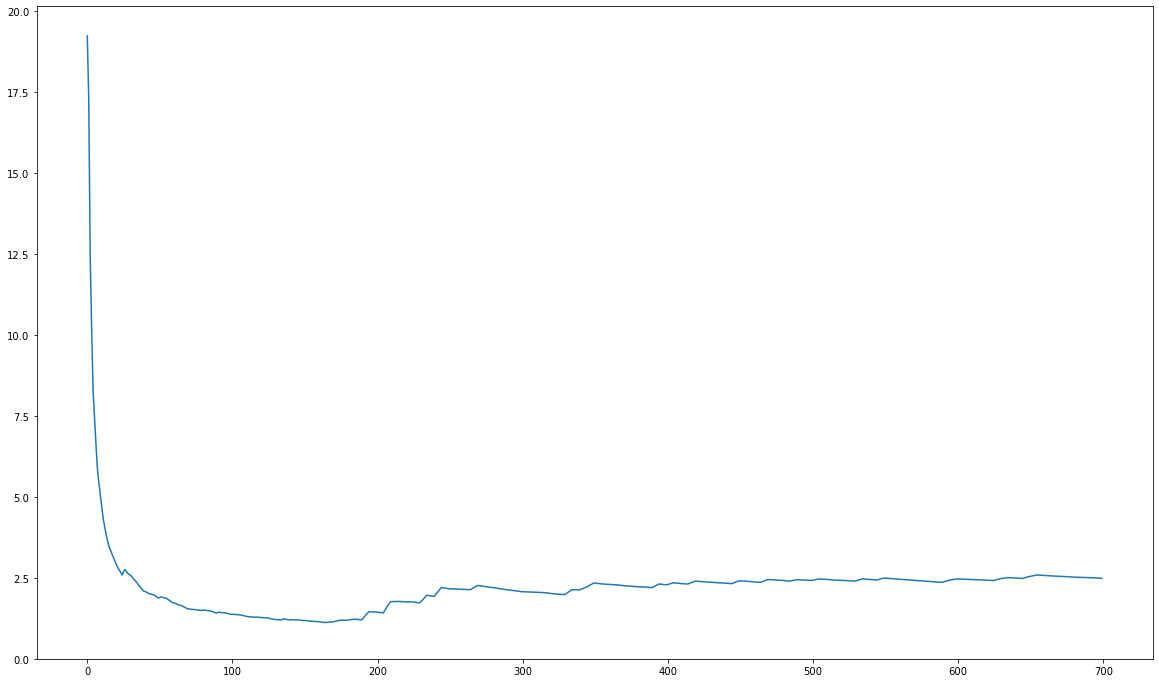

In [6]:
plt.plot(agent._losses)
plt.ylim(bottom=0)
plt.show()

In [7]:
torch.save(agent._q_network.state_dict(), "model.pt")

In [8]:
# agent._q_network.state_dict()

In [9]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=2, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=2, bias=True)
)

In [10]:
# tournament = RoundRobinTournament([
#     AllC,
#     AllD,
#     TitForTat,
#     Davis,
#     Downing,
#     Feld,
#     Graaskamp,
#     Grofman,
#     Grudger,
#     Joss,
#     Nydegger,
#     Shubik,
#     SteinAndRapoport,
#     TidemanAndChieruzzi,
#     Tullock
# ], [agent])

tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=50, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [03:46<00:00,  4.25matches/s]

SteinAndRapoport               789                  57.09625400000002   
Borufsen                       780                  22.786293999999998  
White              775                  20.563656999999996  
Grudger                        771                  17.042393999999998  
OmegaTFT                       771                  17.560242999999996  
TitForTat                      763                  15.259373           
TFTT                           760                  17.346277999999998  
SecondByBlackK83R              758                  20.767494000000006  
TTFT                           752                  17.045565000000003  
GradualTFT                     752                  368.05432900000005  
GenerousTFT                    752                  15.644155           
TidemanAndChieruzzi            752                  21.015945           
TidemanAndChieruzzi2    752                  21.875991999999997  
Weiner                 752                  43.490854000000006  
Champ